In [2]:
from math import sqrt, sin, cos, pi, exp
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import random

def velocity_motion_model(pose, previous_pose,control, time, prob):
    #poses are vectors containing x, y and angular values, respectively
    #control is a vector containing translational velocity and rotational velocity, respectively
    #time is time taken for transition
    #velocity model used for probabilistic motion planning
    #prob is the probability function to use
    x, y, theta = previous_pose
    x_new, y_new, theta_new = pose
    trans_vel, rot_vel = control
    a_1 = 0.01
    a_2 = 0.01
    a_3 = 0.01
    a_4 = 0.01
    a_5 = 0.01
    a_6 = 0.01

    error_free_control_numerator = (x-x_new)*np.cos(rot_vel)+(y-y_new)*np.sin(rot_vel)
    error_free_control_denominator = (x-x_new)*np.cos(rot_vel)-(y-y_new)*np.sin(rot_vel)
    error_free_control = 0.5*error_free_control_numerator/error_free_control_denominator

    x_center = ((x+x_new)/2) + error_free_control*(y-y_new)
    y_center = ((y+y_new)/2) + error_free_control*(x_new-x)
    r_center = np.sqrt((x-x_center)*(x-x_center)+(y-y_center)*(y-y_center))

    angle_change = np.arctan2(y_new-y_center, x_new - x_center) - np.arctan2(y-y_center, x -x_center)

    error_free_trans_vel = angle_change/time * r_center
    error_free_rot_vel = angle_change/time
    rand_term = (theta-theta_new)/time - error_free_rot_vel

    trans_error_prob = prob(trans_vel-error_free_trans_vel, a_1*trans_vel*trans_vel + a_2*rot_vel*rot_vel)
    rot_error_prob = prob(rot_vel-error_free_rot_vel,a_3*trans_vel*trans_vel + a_4*rot_vel*rot_vel)
    rand_term_prob = prob(rand_term, a_5*trans_vel*trans_vel + a_6*rot_vel*rot_vel)

    return trans_error_prob * rot_error_prob * rand_term_prob



In [4]:
def prob_norm(argument,variance):
    return 1/np.sqrt(2*np.pi*variance) * exp(-0.5*argument*argument/variance)

def prob_triangle(argument, variance):
    return max(0, (1/(sqrt(6)*np.sqrt(variance)) - abs(argument)/6*variance ))


In [5]:
def sample_motion_model_velocity(previous_pose,control,time, sample):

    x, y, theta = previous_pose
    trans_vel, rot_vel = control

    a_1 = 0.01
    a_2 = 0.01
    a_3 = 0.01
    a_4 = 0.01
    a_5 = 0.01
    a_6 = 0.01

    trans_error_prob = trans_vel + sample(a_1*trans_vel*trans_vel + a_2*rot_vel*rot_vel)
    rot_error_prob = rot_vel + sample(a_3*trans_vel*trans_vel + a_4*rot_vel*rot_vel)
    rand_term_prob = sample(a_5*trans_vel*trans_vel + a_6*rot_vel*rot_vel)

    x_new = x-(trans_error_prob/rot_error_prob)*sin(theta)+(trans_error_prob/rot_error_prob)*sin(theta+rot_error_prob*time)
    y_new = y+(trans_error_prob/rot_error_prob)*cos(theta)-(trans_error_prob/rot_error_prob)*cos(theta+rot_error_prob*time)
    theta_new = theta+rot_error_prob*time + rand_term_prob*time

    return x_new, y_new, theta_new


In [6]:
def sample_norm(variance):
    sqrt_variance = sqrt(variance)
    sum_list = []
    for i in range(0,12):
        sum_list.append(random.uniform(-sqrt_variance, sqrt_variance))
    return 0.5 * sum(sum_list)

def sample_triangle(variance):
    sqrt_variance = sqrt(variance)
    return (sqrt(6)/2) * (random.uniform(-sqrt_variance, sqrt_variance) + random.uniform(-sqrt_variance, sqrt_variance))

In [34]:
time = 1

In [35]:
previous_pose = [0,0,0]
control = [5,pi]


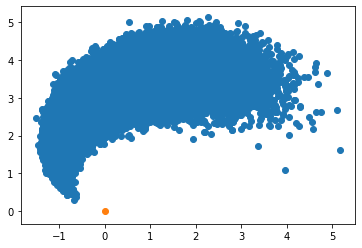

In [36]:
x_list = []
y_list = []
theta_list = []
for i in range(0,100000):
    x,y,theta= sample_motion_model_velocity(previous_pose,control,time, sample_norm)
    x_list.append(x)
    y_list.append(y)
    theta_list.append(theta)
    
plt.scatter(x_list,y_list)
plt.scatter(0,0)

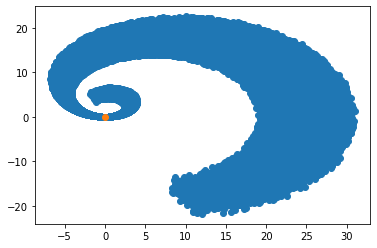

In [10]:
plt.scatter(x_list,y_list)
plt.scatter(0,0)

In [11]:
velocity_motion_model([0,1,0],[0,0,0],[1,0],1,prob_norm)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


nan

In [12]:
 a = np.linspace(-5,5,100)

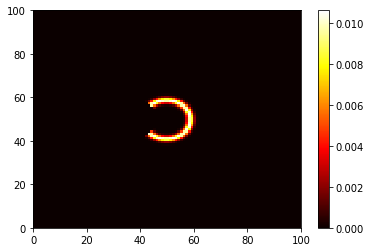

In [13]:
probs = []
for i in range(0,100):
    for j in range(0,100):
        probs.append(velocity_motion_model([a[i],a[j],0],[0,0,0],[1,0],1,prob_norm))
    
new_probs = np.array(probs)
new_probs = np.reshape(new_probs,[100,100])
new_probs = np.divide(new_probs, sum(sum(new_probs)))
plt.pcolormesh(new_probs, cmap = 'hot')
plt.colorbar()

In [14]:
new_probs = np.array(probs)

In [15]:
new_probs = np.ravel(new_probs)
new_probs = np.reshape(new_probs,[100,100])


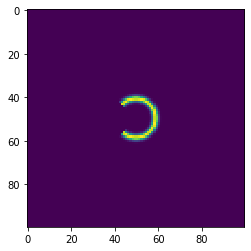

In [16]:
plt.imshow(new_probs)
plt.plot(0,0,markersize = 2000)

In [17]:
sum(sum(new_probs))

4.142415237780859e-104